<a href="https://colab.research.google.com/github/adinugrahadharmaputra/Tugas-Akhir/blob/main/Salinan_dari_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import probplot
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam, SGD,RMSprop
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

## Loading data

In [ ]:
!wget -O Data.xlsx https://raw.githubusercontent.com/adinugrahadharmaputra/Tugas-Akhir/main/Data.xlsx

--2023-12-22 01:52:42--  https://raw.githubusercontent.com/adinugrahadharmaputra/Tugas-Akhir/main/Data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101641 (99K) [application/octet-stream]
Saving to: ‘Data.xlsx’

Data.xlsx           100%[===================>]  99.26K  --.-KB/s    in 0.02s   

2023-12-22 01:52:42 (6.12 MB/s) - ‘Data.xlsx’ saved [101641/101641]



In [ ]:
df_2019 = pd.read_excel("Data.xlsx",sheet_name="2019")
df_2019.set_index('NO', inplace=True)
df_2019['year'] = 2019

# Cheking if data have a right value
cols_to_check = [col for col in df_2019.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2019[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2019[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2019

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Aceh Timur,31161,5458,3811,29.7,2019
2,ACEH,Aceh Tengah,17373,1147,462,9.3,2019
3,ACEH,Pidie,1598,135,7,8.9,2019
4,SUMATERA UTARA,Simalungun,53176,1097,119,2.3,2019
5,SUMATERA UTARA,Langkat,52066,2863,6679,18.3,2019
...,...,...,...,...,...,...,...
111,MALUKU,Maluku Tengah,3535,1401,458,5.3,2019
112,MALUKU,Kepulauan Aru,12506,1376,433,14.5,2019
113,MALUKU,Seram Bagian Barat,2144,572,322,4.2,2019


In [ ]:
df_2019

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Aceh Timur,31161,5458,3811,29.7,2019
2,ACEH,Aceh Tengah,17373,1147,462,9.3,2019
3,ACEH,Pidie,1598,135,7,8.9,2019
4,SUMATERA UTARA,Simalungun,53176,1097,119,2.3,2019
5,SUMATERA UTARA,Langkat,52066,2863,6679,18.3,2019
...,...,...,...,...,...,...,...
111,MALUKU,Maluku Tengah,3535,1401,458,5.3,2019
112,MALUKU,Kepulauan Aru,12506,1376,433,14.5,2019
113,MALUKU,Seram Bagian Barat,2144,572,322,4.2,2019


In [ ]:
df_2020 = pd.read_excel("Data.xlsx",sheet_name="2020")
df_2020.set_index('NO', inplace=True)
df_2020['year'] = 2020

# Cheking if data have a right value
cols_to_check = [col for col in df_2020.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2020[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2020[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2020

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7109,968,452,20.0,2020
2,ACEH,Aceh Tenggara,15947,900,811,10.7,2020
3,ACEH,Aceh Timur,31161,5458,3811,29.7,2020
4,ACEH,Aceh Tengah,17373,1147,462,9.3,2020
5,ACEH,Pidie,1598,135,7,8.9,2020
...,...,...,...,...,...,...,...
240,PAPUA TENGAH,NABIRE,672,737,377,16.6,2020
241,PAPUA BARAT DAYA,SORONG SELATAN,4057,460,388,20.9,2020
242,PAPUA BARAT DAYA,RAJA AMPAT,4275,407,223,14.7,2020


In [ ]:
df_2021 = pd.read_excel("Data.xlsx",sheet_name="2021")
df_2021.set_index('NO', inplace=True)
df_2021['year'] = 2021

# Cheking if data have a right value
cols_to_check = [col for col in df_2021.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2021[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2021[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2021

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7723,1071,389,18.9,2021
2,ACEH,Aceh Tenggara,15843,1982,1006,18.9,2021
3,ACEH,Aceh Timur,26435,4287,1695,22.6,2021
4,ACEH,Aceh Tengah,18153,1151,450,8.8,2021
5,ACEH,Aceh Besar,30057,2784,1436,14.0,2021
...,...,...,...,...,...,...,...
355,PAPUA BARAT DAYA,SORONG,4791,545,295,17.5,2021
356,PAPUA BARAT DAYA,RAJA AMPAT,4609,272,151,9.2,2021
357,PAPUA BARAT DAYA,TAMBRAUW,498,78,46,24.9,2021


In [ ]:
df_2022 = pd.read_excel("Data.xlsx",sheet_name="2022")
df_2022.set_index('NO', inplace=True)
df_2022['year'] = 2022

# Cheking if data have a right value
cols_to_check = [col for col in df_2022.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2022[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2022[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2022

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,8263,1265,360,19.7,2022
2,ACEH,Aceh Singkil,11066,873,239,10.0,2022
3,ACEH,Aceh Selatan,14626,1326,386,11.7,2022
4,ACEH,Aceh Tenggara,18844,1693,639,12.4,2022
5,ACEH,Aceh Timur,41306,2069,795,6.9,2022
...,...,...,...,...,...,...,...
504,PAPUA BARAT DAYA,SORONG,10301,446,257,6.8,2022
505,PAPUA BARAT DAYA,RAJA AMPAT,4872,343,165,10.4,2022
506,PAPUA BARAT DAYA,TAMBRAUW,2487,198,104,12.1,2022


In [ ]:
df_2023 = pd.read_excel("Data.xlsx",sheet_name="2023")
df_2023.set_index('NO', inplace=True)
df_2023['year'] = 2023

# Cheking if data have a right value
cols_to_check = [col for col in df_2023.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2023[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2023[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2023

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7148,891,236,15.8,2023
2,ACEH,Aceh Singkil,12254,812,232,8.5,2023
3,ACEH,Aceh Selatan,18656,343,137,2.6,2023
4,ACEH,Aceh Tenggara,18754,1175,332,8.0,2023
5,ACEH,Aceh Timur,32439,2648,884,10.9,2023
...,...,...,...,...,...,...,...
506,PAPUA BARAT DAYA,SORONG,9009,254,100,3.9,2023
507,PAPUA BARAT DAYA,RAJA AMPAT,2239,422,163,26.1,2023
508,PAPUA BARAT DAYA,TAMBRAUW,793,165,97,33.0,2023


In [ ]:
data_test = df_2023

In [ ]:
combined_df = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023], ignore_index=True)

In [ ]:
combined_df

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
0,ACEH,Aceh Timur,7148,891,236,15.8,2019
1,ACEH,Aceh Tengah,12254,812,232,8.5,2019
2,ACEH,Pidie,18656,343,137,2.6,2019
3,SUMATERA UTARA,Simalungun,18754,1175,332,8.0,2019
4,SUMATERA UTARA,Langkat,32439,2648,884,10.9,2019
...,...,...,...,...,...,...,...
1731,PAPUA BARAT DAYA,SORONG,9009,254,100,3.9,2023
1732,PAPUA BARAT DAYA,RAJA AMPAT,2239,422,163,26.1,2023
1733,PAPUA BARAT DAYA,TAMBRAUW,793,165,97,33.0,2023
1734,PAPUA BARAT DAYA,MAYBRAT,1748,129,72,11.5,2023


In [ ]:
# Filter and display cities with year 2019
cities_2019 = combined_df[combined_df['year'] == 2019]
cities_2019

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
0,ACEH,Aceh Timur,7148,891,236,15.8,2019
1,ACEH,Aceh Tengah,12254,812,232,8.5,2019
2,ACEH,Pidie,18656,343,137,2.6,2019
3,SUMATERA UTARA,Simalungun,18754,1175,332,8.0,2019
4,SUMATERA UTARA,Langkat,32439,2648,884,10.9,2019
...,...,...,...,...,...,...,...
110,MALUKU,Maluku Tengah,1935,302,100,2.1,2019
111,MALUKU,Kepulauan Aru,117215,366,151,0.4,2019
112,MALUKU,Seram Bagian Barat,16091,66,25,0.6,2019
113,MALUKU UTARA,Kepulauan Sula,9795,70,35,1.1,2019


In [ ]:
# Filter city names with year 2019 and display only the 'Kota' column
cities_2019 = combined_df.loc[combined_df['year'] == 2019, 'Kota']
cities_2019

0              Aceh Timur
1             Aceh Tengah
2                   Pidie
3              Simalungun
4                 Langkat
              ...        
110         Maluku Tengah
111         Kepulauan Aru
112    Seram Bagian Barat
113        Kepulauan Sula
114     Halmahera Selatan
Name: Kota, Length: 115, dtype: object

In [ ]:
# Pivot the DataFrame to restructure it based on the 'year' column
pivot_data = combined_df.pivot_table(index=['PROVINSI', 'Kota'], columns='year', values=['Jumlah balita', 'Pendek', 'Sangat Pendek', 'Prevalensi'])

# Flatten the column names and reset the index
pivot_data.columns = [f'{col[0]} {col[1]}' for col in pivot_data.columns]
pivot_data = pivot_data.reset_index()

print(pivot_data)

           PROVINSI              Kota  Jumlah balita 2019  Jumlah balita 2020  \
0              ACEH        Aceh Barat                 NaN                 NaN   
1              ACEH   Aceh Barat Daya                 NaN                 NaN   
2              ACEH        Aceh Besar                 NaN                 NaN   
3              ACEH         Aceh Jaya                 NaN                 NaN   
4              ACEH      Aceh Selatan                 NaN                 NaN   
..              ...               ...                 ...                 ...   
530  SUMATERA UTARA        Simalungun             18754.0             53176.0   
531  SUMATERA UTARA  Tapanuli Selatan                 NaN                 NaN   
532  SUMATERA UTARA   Tapanuli Tengah                 NaN             14069.0   
533  SUMATERA UTARA    Tapanuli Utara                 NaN                 NaN   
534  SUMATERA UTARA      Toba Samosir                 NaN                 NaN   

     Jumlah balita 2021  Ju

In [ ]:
pivot_data

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Barat,NaN,NaN,NaN,14787.0,12434.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,3.6,NaN,NaN,NaN,177.0,103.0
1,ACEH,Aceh Barat Daya,NaN,NaN,NaN,12546.0,8014.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.6,11.9,NaN,NaN,NaN,276.0,221.0
2,ACEH,Aceh Besar,NaN,NaN,30057.0,35553.0,3389.0,NaN,NaN,2784.0,...,NaN,NaN,14.0,11.8,14.2,NaN,NaN,1436.0,996.0,1071.0
3,ACEH,Aceh Jaya,NaN,NaN,NaN,5471.0,7062.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21.4,10.6,NaN,NaN,NaN,249.0,172.0
4,ACEH,Aceh Selatan,NaN,NaN,NaN,14626.0,18656.0,NaN,NaN,NaN,...,NaN,NaN,NaN,11.7,2.6,NaN,NaN,NaN,386.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,SUMATERA UTARA,Simalungun,18754.0,53176.0,51243.0,43137.0,37929.0,1175.0,1097.0,666.0,...,8.0,2.3,1.6,2.1,1.3,332.0,119.0,168.0,171.0,92.0
531,SUMATERA UTARA,Tapanuli Selatan,NaN,NaN,NaN,22826.0,2356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.9,1.8,NaN,NaN,NaN,38.0,83.0
532,SUMATERA UTARA,Tapanuli Tengah,NaN,14069.0,24357.0,22431.0,20579.0,NaN,1239.0,1358.0,...,NaN,12.0,7.1,6.8,2.4,NaN,443.0,368.0,398.0,75.0
533,SUMATERA UTARA,Tapanuli Utara,NaN,NaN,20003.0,20032.0,18842.0,NaN,NaN,1323.0,...,NaN,NaN,8.2,6.3,9.6,NaN,NaN,318.0,240.0,447.0


In [ ]:
pivot_data.head()

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Barat,NaN,NaN,NaN,14787.0,12434.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,3.6,NaN,NaN,NaN,177.0,103.0
1,ACEH,Aceh Barat Daya,NaN,NaN,NaN,12546.0,8014.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.6,11.9,NaN,NaN,NaN,276.0,221.0
2,ACEH,Aceh Besar,NaN,NaN,30057.0,35553.0,3389.0,NaN,NaN,2784.0,...,NaN,NaN,14.0,11.8,14.2,NaN,NaN,1436.0,996.0,1071.0
3,ACEH,Aceh Jaya,NaN,NaN,NaN,5471.0,7062.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21.4,10.6,NaN,NaN,NaN,249.0,172.0
4,ACEH,Aceh Selatan,NaN,NaN,NaN,14626.0,18656.0,NaN,NaN,NaN,...,NaN,NaN,NaN,11.7,2.6,NaN,NaN,NaN,386.0,137.0


In [ ]:
# Assuming 'pivot_data' is your DataFrame containing the structured data
# Drop rows with NaN values
pivot_data.dropna(inplace=True)

# Reset the index if needed
pivot_data.reset_index(drop=True, inplace=True)


In [ ]:
data = pivot_data
data

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Tengah,12254.0,17373.0,18153.0,18213.0,16907.0,812.0,1147.0,1151.0,...,8.5,9.3,8.8,8.7,7.8,232.0,462.0,450.0,385.0,339.0
1,ACEH,Aceh Timur,7148.0,31161.0,26435.0,41306.0,32439.0,891.0,5458.0,4287.0,...,15.8,29.7,22.6,6.9,10.9,236.0,3811.0,1695.0,795.0,884.0
2,ACEH,Pidie,18656.0,1598.0,36222.0,32703.0,34865.0,343.0,135.0,2059.0,...,2.6,8.9,7.1,4.8,4.5,137.0,7.0,515.0,451.0,276.0
3,BALI,Buleleng,33172.0,24191.0,28752.0,27997.0,28488.0,1663.0,2165.0,1255.0,...,6.1,12.3,5.9,3.6,3.7,346.0,818.0,439.0,183.0,305.0
4,BALI,Gianyar,32456.0,28277.0,25622.0,25601.0,25671.0,2207.0,1229.0,991.0,...,8.3,5.9,4.9,3.6,3.2,501.0,453.0,257.0,214.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SUMATERA SELATAN,Muara Enim,11903.0,24291.0,37669.0,48624.0,44296.0,776.0,998.0,1942.0,...,8.3,6.0,7.5,3.2,2.2,214.0,461.0,883.0,451.0,240.0
97,SUMATERA SELATAN,Ogan Komering Ilir,22015.0,1444.0,14277.0,51609.0,53038.0,740.0,891.0,868.0,...,4.8,8.6,8.5,3.2,1.1,317.0,355.0,339.0,471.0,177.0
98,SUMATERA UTARA,Langkat,32439.0,52066.0,52203.0,52154.0,52203.0,2648.0,2863.0,2856.0,...,10.9,18.3,18.3,15.3,13.6,884.0,6679.0,6692.0,5539.0,2409.0
99,SUMATERA UTARA,Padang Lawas,16907.0,17362.0,19649.0,1983.0,1983.0,978.0,1316.0,861.0,...,7.8,11.4,5.8,5.5,5.5,339.0,660.0,283.0,264.0,264.0


# Preprocessing

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_columns].corr()['Prevalensi 2022'].abs().drop('Prevalensi 2022')
max_correlation_variable = correlations.idxmax()
X_selected = data[[max_correlation_variable]]
y_selected = data['Prevalensi 2022']
correlations

Jumlah balita 2019    0.070387
Jumlah balita 2020    0.217753
Jumlah balita 2021    0.243865
Jumlah balita 2022    0.271074
Jumlah balita 2023    0.289851
Pendek 2019           0.114748
Pendek 2020           0.021762
Pendek 2021           0.023655
Pendek 2022           0.182145
Pendek 2023           0.145056
Prevalensi 2019       0.201106
Prevalensi 2020       0.819661
Prevalensi 2021       0.843854
Prevalensi 2023       0.833664
Sangat Pendek 2019    0.106353
Sangat Pendek 2020    0.178878
Sangat Pendek 2021    0.112516
Sangat Pendek 2022    0.199373
Sangat Pendek 2023    0.080825
Name: Prevalensi 2022, dtype: float64

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_columns].corr()['Prevalensi 2023'].abs().drop('Prevalensi 2023')
max_correlation_variable = correlations.idxmax()
X_selected = data[[max_correlation_variable]]
y_selected = data['Prevalensi 2023']
correlations

Jumlah balita 2019    0.071585
Jumlah balita 2020    0.241441
Jumlah balita 2021    0.223893
Jumlah balita 2022    0.217321
Jumlah balita 2023    0.296436
Pendek 2019           0.160172
Pendek 2020           0.003771
Pendek 2021           0.044913
Pendek 2022           0.165008
Pendek 2023           0.190197
Prevalensi 2019       0.194459
Prevalensi 2020       0.769394
Prevalensi 2021       0.803291
Prevalensi 2022       0.833664
Sangat Pendek 2019    0.131025
Sangat Pendek 2020    0.161005
Sangat Pendek 2021    0.107237
Sangat Pendek 2022    0.190824
Sangat Pendek 2023    0.123610
Name: Prevalensi 2023, dtype: float64

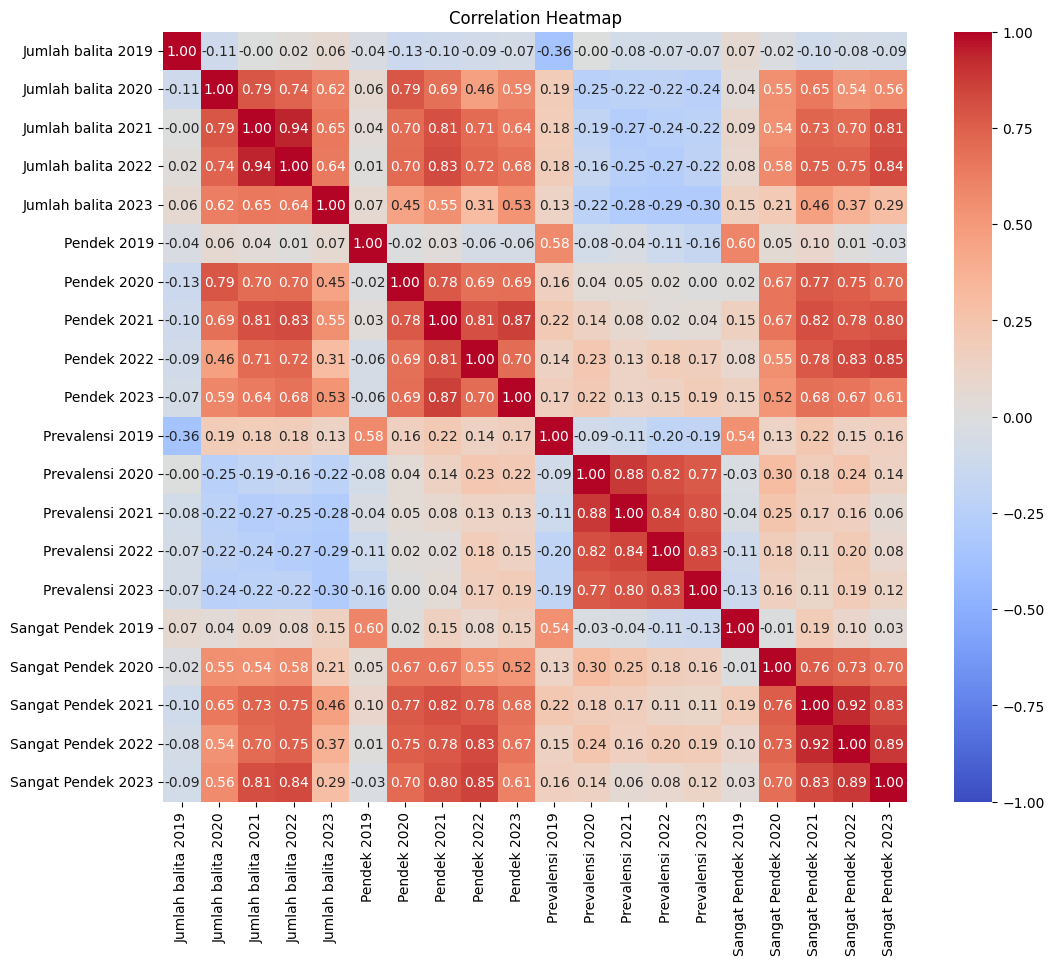

In [ ]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into features and target variable
X = data[['Jumlah balita 2019', 'Jumlah balita 2020','Jumlah balita 2021', 'Prevalensi 2019',  'Prevalensi 2020', 'Prevalensi 2021']]
y =data['Prevalensi 2022']
X_2023 = data[['Jumlah balita 2020', 'Jumlah balita 2021','Jumlah balita 2022', 'Prevalensi 2020',  'Prevalensi 2021', 'Prevalensi 2022']]
y_2023 = data['Prevalensi 2023']


X.columns = [f'{i}' for i in range(len(X.columns))]
# y.columns = [f'{i}' for i in range(len(y.columns))]
X_2023.columns = [f'{i}' for i in range(len(X_2023.columns))]
# y_2023.columns = [f'{i}' for i in range(len(y_2023.columns))]


In [ ]:
skewness_values = data[numeric_columns].apply(pd.Series.skew)
skewness_values

Jumlah balita 2019    2.397856
Jumlah balita 2020    2.320194
Jumlah balita 2021    3.694702
Jumlah balita 2022    3.994008
Jumlah balita 2023    1.836621
Pendek 2019           1.919653
Pendek 2020           3.252993
Pendek 2021           2.868973
Pendek 2022           3.481161
Pendek 2023           1.745021
Prevalensi 2019       0.837098
Prevalensi 2020       1.119743
Prevalensi 2021       1.049383
Prevalensi 2022       1.402882
Prevalensi 2023       0.931285
Sangat Pendek 2019    3.762939
Sangat Pendek 2020    3.253341
Sangat Pendek 2021    3.588315
Sangat Pendek 2022    4.290645
Sangat Pendek 2023    6.844663
dtype: float64

In [ ]:
average_skewness = skewness_values.mean()
average_skewness

2.7295737454493336

In [ ]:
def plot_prob_hist(data):
    if isinstance(data, np.ndarray):
        num_columns = data.shape[1]
        column_names = [f'Column {i + 1}' for i in range(num_columns)]
    else:
        num_columns = len(data.columns)
        column_names = data.columns

    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 2 * num_columns))

    for i in range(num_columns):
        if isinstance(data, np.ndarray):
            column_data = data[:, i]
        else:
            column_data = data.iloc[:, i]

        probplot(column_data, plot=axes[i, 0])
        axes[i, 0].set_title(f'Probability Plot - {column_names[i]}')

        axes[i, 1].hist(column_data, bins=20, density=True, alpha=0.5)
        axes[i, 1].set_title(f'Histogram - {column_names[i]}')

    plt.tight_layout()
    plt.show()

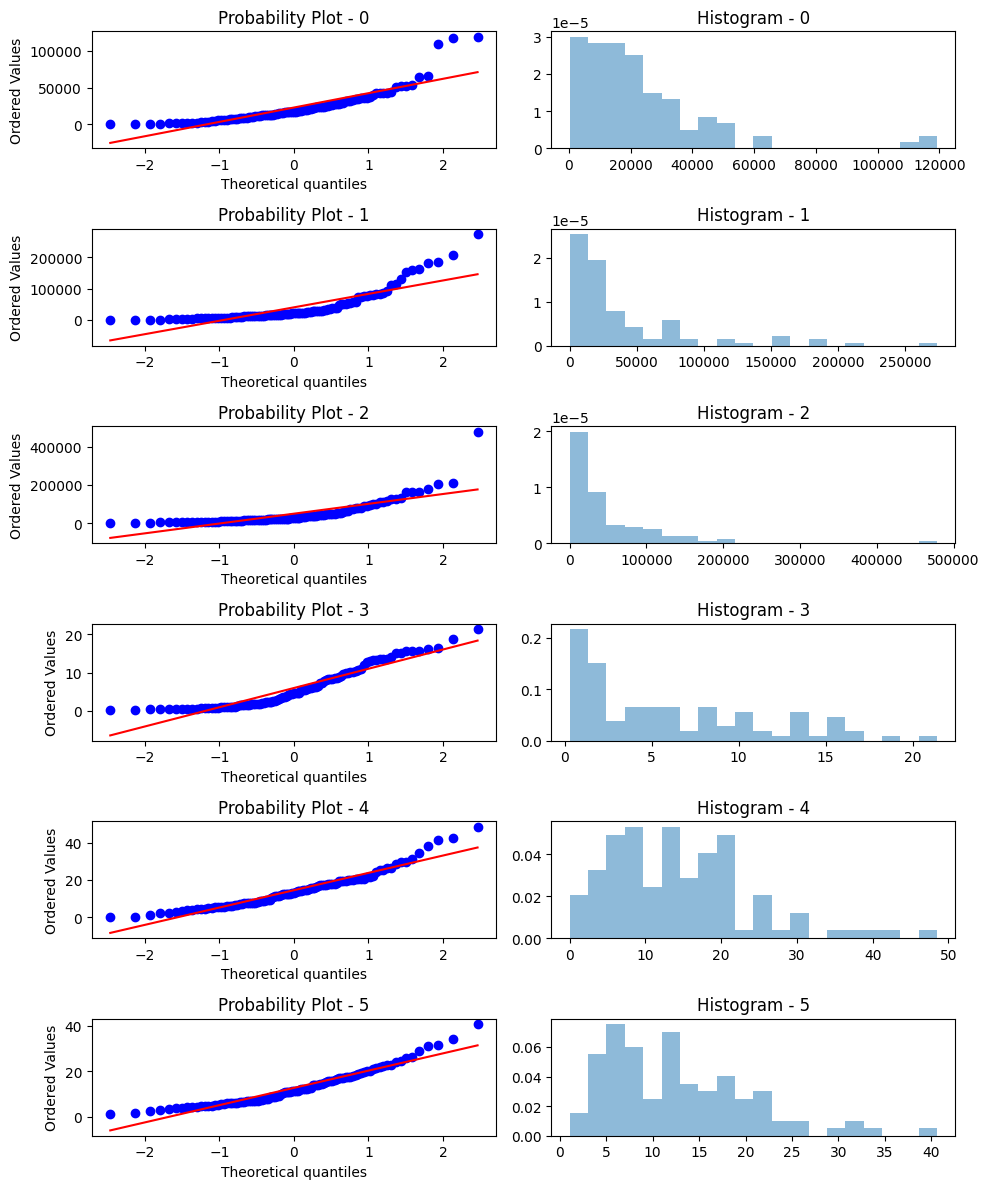

In [ ]:
plot_prob_hist(X)

In [ ]:
X.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [ ]:
y.dtypes

dtype('float64')

In [ ]:
X_2023.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [ ]:
y_2023.dtypes

dtype('float64')

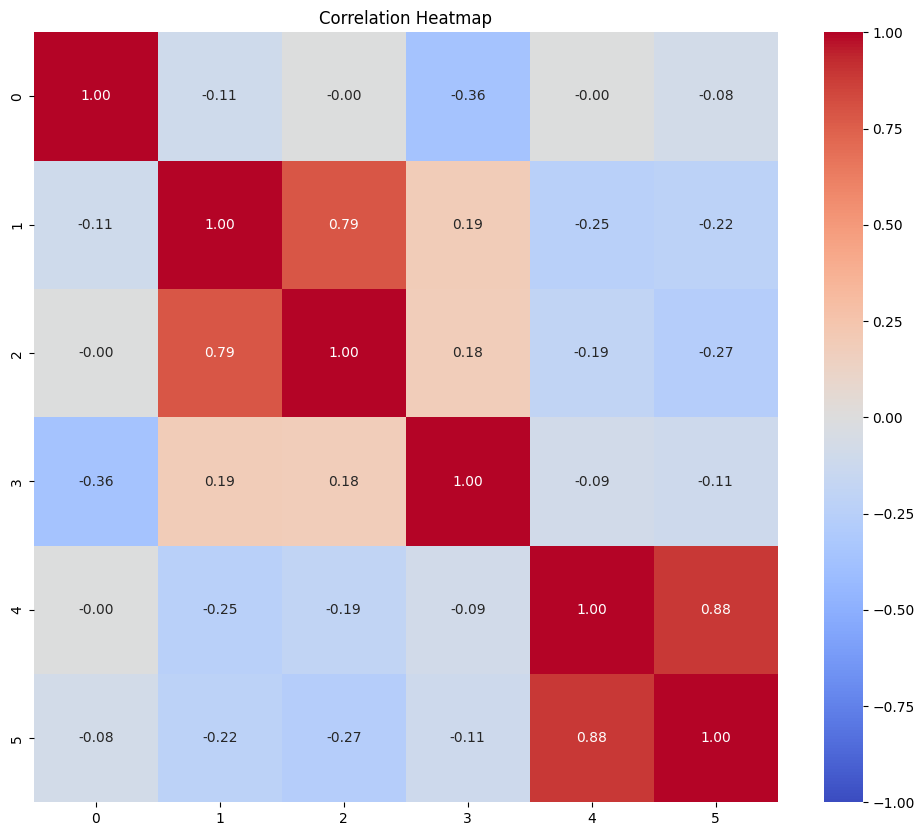

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
unscaled_X_train, unscaled_X_test=X_train, X_test

In [ ]:
unscaled_X_train

,0,1,2,3,4,5
89,44296.0,50195.0,50195.0,2.2,4.4,4.4
26,22679.0,0.0,97533.0,10.1,0.0,6.1
42,15471.0,80364.0,79356.0,0.4,16.1,16.1
70,12364.0,14184.0,14184.0,8.3,26.2,26.2
15,20579.0,962.0,211413.0,2.4,14.4,6.4
...,...,...,...,...,...,...
60,1161.0,53892.0,44316.0,13.6,3.9,6.0
71,52666.0,21927.0,21928.0,1.6,17.3,17.3
14,14035.0,182632.0,164124.0,7.2,7.7,11.8
92,53038.0,16232.0,16232.0,1.1,1.1,1.1


In [ ]:
unscaled_X_test

,0,1,2,3,4,5
84,39583.0,4656.0,46097.0,6.3,7.8,3.9
55,4546.0,4909.0,4909.0,0.7,14.1,14.1
66,28333.0,12869.0,15204.0,6.2,25.2,22.6
67,2457.0,17898.0,15131.0,4.6,17.7,21.2
45,7211.0,37226.0,36528.0,3.6,13.0,11.4
39,11524.0,151534.0,129077.0,2.4,12.1,11.4
22,52203.0,9289.0,97451.0,13.6,19.7,14.1
44,17555.0,81896.0,61507.0,13.3,3.9,3.9
10,8139.0,14565.0,15414.0,3.9,7.3,7.1
0,12254.0,17373.0,18153.0,8.5,9.3,8.8


In [ ]:
# Scale the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)
X_2023_scaled = scaler.transform(X_2023)

In [ ]:
X_train.shape

(80, 6)

In [ ]:
X_2023_scaled.shape

(101, 6)

In [ ]:
X_test.shape

(21, 6)

In [ ]:
X_test.shape[1]

6

# ANN MODEL

In [ ]:
# Build the neural network model
ANN_model = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],), input_dim = 2),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [ ]:
# Compile the model
ANN_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = ANN_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/1000
1/3 [=========>....................] - ETA: 4s - loss: 182.7484
Epoch 1: val_loss improved from inf to 227.46677, saving model to best_model.h5
3/3 [==============================] - 3s 482ms/step - loss: 194.4762 - val_loss: 227.4668
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 219.8929
Epoch 2: val_loss improved from 227.46677 to 227.29929, saving model to best_model.h5
3/3 [==============================] - 0s 57ms/step - loss: 194.3271 - val_loss: 227.2993
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 194.1650

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 227.29929 to 227.12709, saving model to best_model.h5
3/3 [==============================] - 0s 79ms/step - loss: 194.1711 - val_loss: 227.1271
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 201.0849
Epoch 4: val_loss improved from 227.12709 to 226.95001, saving model to best_model.h5
3/3 [==============================] - 0s 77ms/step - loss: 194.0081 - val_loss: 226.9500
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 198.6196
Epoch 5: val_loss improved from 226.95001 to 226.76646, saving model to best_model.h5
3/3 [==============================] - 0s 91ms/step - loss: 193.8468 - val_loss: 226.7665
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 226.6431
Epoch 6: val_loss improved from 226.76646 to 226.57706, saving model to best_model.h5
3/3 [==============================] - 0s 136ms/step - loss: 193.6769 - val_loss: 226.5771
Epoch 7/1000
1/3 [=========>....................] - ETA: 0s - l

In [ ]:
ANN_model = load_model('best_model.h5')

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Make predictions for 2023
ANN_y_pred = ANN_model.predict(X_test)

In [ ]:
# Evaluate the model
ANN_mse = ANN_model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {ANN_mse}")

In [ ]:
ANN_r2 = r2_score(y_test, ANN_y_pred)
print(f'R-squared score: {ANN_r2}')

In [ ]:
num_samples_to_compare = 10  # Choose the number of samples to compare
indices = np.random.choice(len(y_test), num_samples_to_compare, replace=False)

for idx in indices:
    print(f"Actual: {y_test.iloc[idx]}, Predicted: {ANN_y_pred[idx]}")

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ANN_y_pred, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
ANN_y_pred_X= ANN_model.predict(X_2023_scaled)

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_2023, ANN_y_pred_X, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_2023), max(y_2023)], [min(y_2023), max(y_2023)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
ANN_mse_X = mean_squared_error(y_2023, ANN_y_pred_X)
print(f"Mean Squared Error: {ANN_mse_X}")

In [ ]:
ANN_r2_X = r2_score(y_2023, ANN_y_pred_X)
print(f'R-squared score: {ANN_r2_X}')

# Gradiaen Boosting Model

In [ ]:
XGB_model = XGBRegressor()

In [ ]:
XGB_model.fit(X_train, y_train)

In [ ]:
XGB_y_pred = XGB_model.predict(X_test)

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
XGB_mse = mean_squared_error(y_test, XGB_y_pred)
print(f"Mean Squared Error: {XGB_mse}")

In [ ]:
XGB_r2 = r2_score(y_test, XGB_y_pred)
print(f'R-squared score: {XGB_r2}')

In [ ]:
num_samples_to_compare = 10  # Choose the number of samples to compare
indices = np.random.choice(len(y_test), num_samples_to_compare, replace=False)

for idx in indices:
    print(f"Actual: {y_test.iloc[idx]}, Predicted: {XGB_y_pred[idx]}")

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, XGB_y_pred, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
XGB_y_pred_X= XGB_model.predict(X_2023_scaled)

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_2023, XGB_y_pred_X, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_2023), max(y_2023)], [min(y_2023), max(y_2023)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
num_samples_to_compare = 10  # Choose the number of samples to compare
indices = np.random.choice(len(y_2023), num_samples_to_compare, replace=False)

for idx in indices:
    print(f"Actual: {y_2023.iloc[idx]}, Predicted: {XGB_y_pred_X[idx]}")

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
XGB_mse_X = mean_squared_error(y, XGB_y_pred_X)
print(f"Mean Squared Error: {XGB_mse_X}")

In [ ]:
XGB_r2_X = r2_score(y, XGB_y_pred_X)
print(f'R-squared score: {XGB_r2_X}')

In [ ]:
print(f"ANN  Mean Squared Error: {ANN_mse_X}")
print(f'ANN R-squared score: {ANN_r2_X}')
print(f"XGB Mean Squared Error: {XGB_mse_X}")
print(f'XGB R-squared score: {XGB_r2_X}')

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, XGB_y_pred, color='blue', label=f'XGBoost (MSE={XGB_mse:.2f})')
plt.scatter(y_test, ANN_y_pred, color='red', label=f'ANN (MSE={ANN_mse:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_2023, XGB_y_pred_X, color='blue', label=f'XGBoost (MSE={XGB_mse:.2f})')
plt.scatter(y_2023, ANN_y_pred_X, color='red', label=f'ANN (MSE={ANN_mse:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Linear Regression

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_train, y_train)

In [ ]:
LR_y_pred = LR_model.predict(X_test)

In [ ]:
LR_mse = mean_squared_error(y_test, LR_y_pred)
LR_r2 = r2_score(y_test, LR_y_pred)
print(f'Mean Squared Error: {LR_mse}')
print(f'R-squared: {LR_r2}')

In [ ]:
LR_y_pred_X = LR_model.predict(X_2023_scaled)

In [ ]:
LR_mse_X = mean_squared_error(y_2023, LR_y_pred_X)
LR_r2_X = r2_score(y_2023, LR_y_pred_X)
print(f'Mean Squared Error: {LR_mse_X}')
print(f'R-squared: {LR_r2_X}')

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, XGB_y_pred, color='blue', label=f'XGBoost (MSE={XGB_mse:.2f}, R2 = {XGB_r2})')
plt.scatter(y_test, ANN_y_pred, color='red', label=f'ANN (MSE={ANN_mse:.2f}, R2 = {ANN_r2})')
plt.scatter(y_test, LR_y_pred, color='green', label=f'LR (MSE={LR_mse:.2f}, R2 = {LR_r2})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_2023, XGB_y_pred_X, color='blue', label=f'XGBoost (MSE={XGB_mse_X:.2f}, R2 = {XGB_r2_X})')
plt.scatter(y_2023, ANN_y_pred_X, color='red', label=f'ANN (MSE={ANN_mse_X:.2f}, R2 = {ANN_r2_X})')
plt.scatter(y_2023, LR_y_pred_X, color='green', label=f'LR (MSE={LR_mse_X:.2f}, R2 = {LR_r2_X})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()